## Variable distributions and their effects on Models

Reference 
[https://www.statisticssolutions.com/homoscedasticity/]

### Linear Regression Assumptions

- Linear relationship with the outcome Y
- Homoscedasticity
- Normality
- No Multicollinearity 

## Linear Assumption

- The X variable is linearly related to the dataset 
- Pearson correlation coefficient can determine the linearity magnitude  between variables 

## Normality Assumption

- The variable X follows a normal or gaussian distribution

## Homoscedasticity Assumption

- Homogeneity of variance

- Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables


### Unaffected models

- Neural Networks
- Support Vector Machines
- Trees



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
sns.set()
import pandas as pd



In [ ]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
dataset.data.shape

(506, 13)

In [ ]:
dataset.target.shape

(506,)

## Quantile transform

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

Reference: https://scikit-learn.org/

In [ ]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform
X = dataset.data
y = dataset.target
y_temp = quantile_transform(y.reshape(-1,1),
                                n_quantiles=300,
                                output_distribution='normal',
                                copy=True)

y_processed = y

X_processed = quantile_transform(X,
                                n_quantiles=300,
                                output_distribution='normal',
                                copy=True)

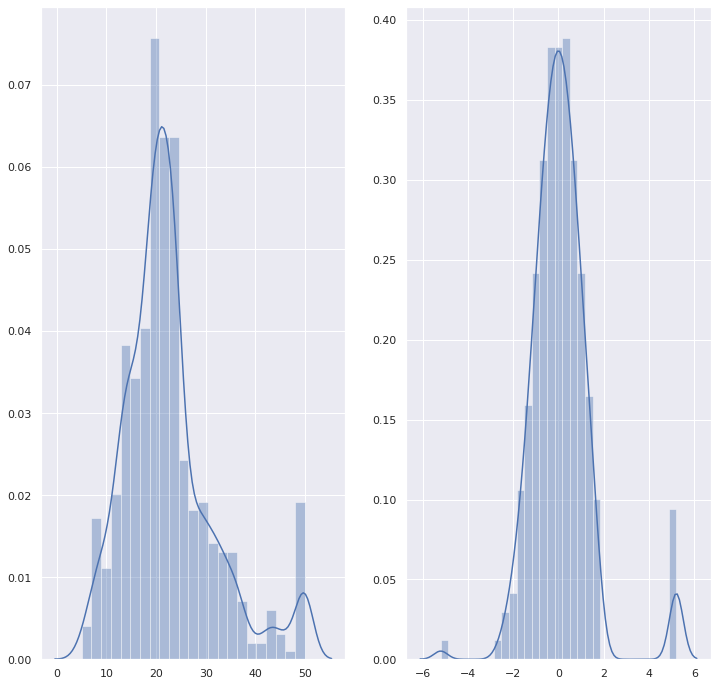

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
sns.distplot(y, ax=ax[0])
sns.distplot(y_temp, ax=ax[1])

In [ ]:
X.shape

(506, 13)

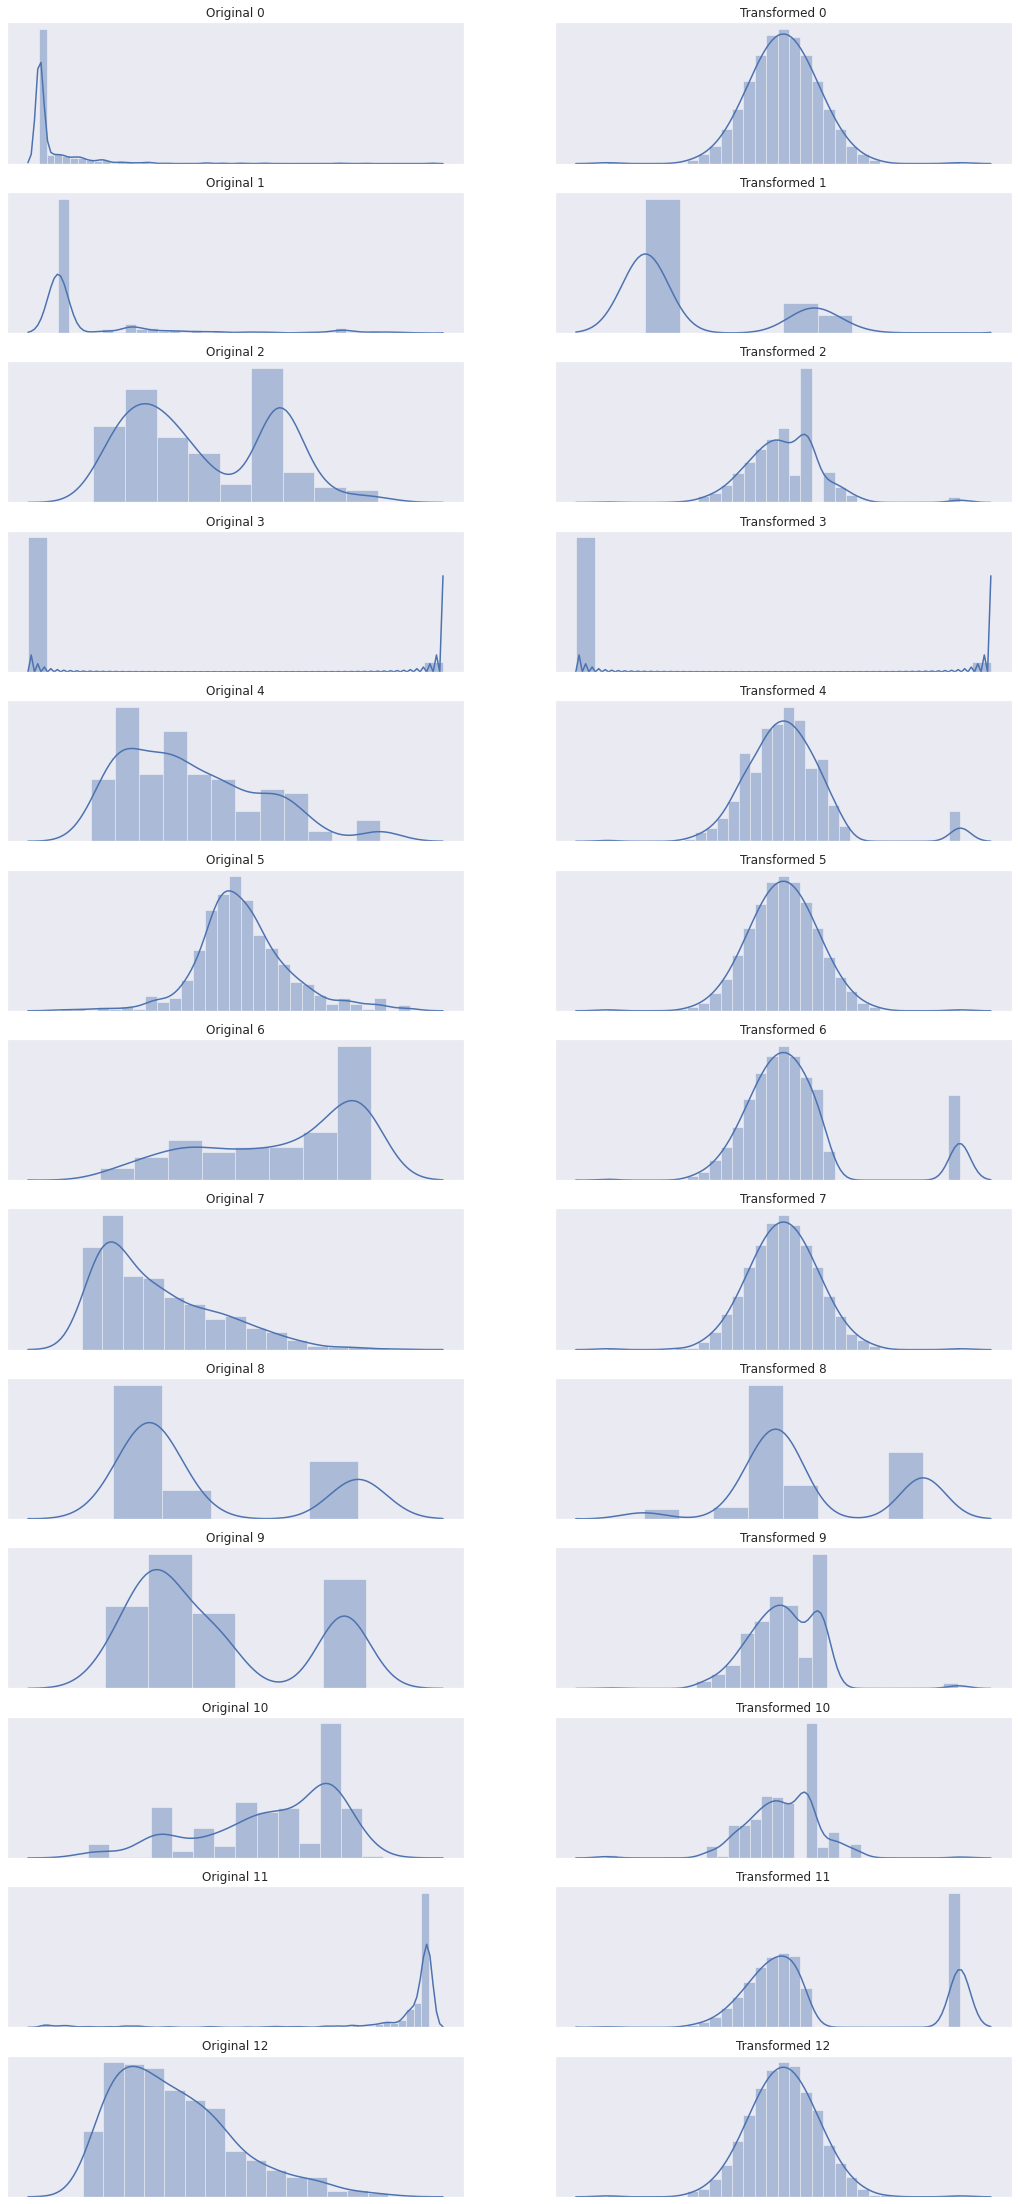

In [ ]:
fig, ax = plt.subplots(13,2, figsize=(18,40))
for i in range(X.shape[1]):
  sns.distplot(X[:,i], ax=ax[i][0])
  ax[i][0].set_title("Original " + str(i))
  ax[i][0].set_xticks([])
  ax[i][0].set_yticks([])
  sns.distplot(X_processed[:,i], ax=ax[i][1])
  ax[i][1].set_title("Transformed " + str(i))
  ax[i][1].set_xticks([])
  ax[i][1].set_yticks([])


## Effect on Models

In [ ]:
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed,
                                                    y_processed,
                                                    test_size=0.2)

X_train_processed.shape, X_test_processed.shape

((404, 13), (102, 13))

In [ ]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train_processed = obj.fit_transform(X_train_processed)
X_test_processed = obj.transform(X_test_processed)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))


27.85235294117647
37.133039215686274


In [ ]:
from sklearn.linear_model import RidgeCV
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))



20.120980392156863
30.887941176470587


In [ ]:
from sklearn.linear_model import Ridge
model = RidgeCV()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))



24.146470588235296
35.95852941176471


In [ ]:
from sklearn.svm import SVR
model = SVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))



6.109215686274508
15.764411764705883


In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


17.538627450980396
18.958529411764705


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

11.52490196078431
30.801666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))

11.707254901960788
17.521274509803927


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
y_pred_processed = np.round(y_pred_processed).flatten()
print(mean_squared_error(y_test_processed, y_pred_processed))

12.89745098039216
23.962450980392163


In [ ]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model = TransformedTargetRegressor( regressor=model,
                                    transformer=QuantileTransformer(n_quantiles=300,
                                                                    output_distribution='normal'))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

model.fit(X_train_processed,y_train_processed)
y_pred_processed = model.predict(X_test_processed)
print(mean_squared_error(y_test_processed, y_pred_processed))


24.936666666666667
35.76833333333333
